In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("c:/Users/jagdi/Downloads/spamham.csv")

In [3]:
df.head()

,Text,Label
0,Supply Quality China's EXCLUSIVE dimensions at...,spam
1,over. SidLet me know. Thx.,ham
2,"Dear Friend,Greetings to you.I wish to accost ...",spam
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,spam
4,Not a surprising assessment from Embassy.,ham


In [4]:
df["Label"].value_counts()

ham     2732
spam    2113
Name: Label, dtype: int64

In [5]:
import matplotlib.pyplot as plt

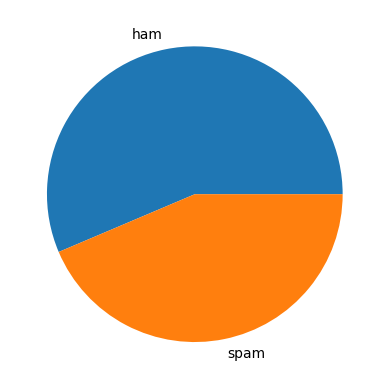

In [6]:
plt.pie(df["Label"].value_counts(),labels=['ham','spam'])
plt.show()

In [26]:
# import nltk
# nltk.download('omw-1.4')

In [8]:
def prep_txt(w):
    import re
    q = re.sub("[^a-zA-Z0-9 ]","",w)
    q = q.lower()
    q = q.split(" ")
#     removing StopWords
    from nltk.corpus import stopwords
    sw = stopwords.words("english")
    from nltk.stem import PorterStemmer,WordNetLemmatizer
    ps = PorterStemmer()
    wnl = WordNetLemmatizer()
    r = ""
    for i in q:
        if(i not in sw):
            t = wnl.lemmatize(i)
            t = ps.stem(t)
            r = r + " " + t
    return r
Q = []
for i in df.Text:
    Q.append(prep_txt(i))

In [9]:
Q

[' suppli qualiti china exclus dimens unbeat pricedear sir pleas inform one china largest export  import stone companywanliston group group subsidiari special quarri process sale dimens stone slab tile dimens stone product build materi sector specialti markets2 group oper base xiamen south china largest export import busi portal china wanliston own oper variou natur stone deposit 6000 squar meter countri addit quarri wanliston fulli autom process plant process granit marbl granit product wanliston suppli granit raw block form granit marbl tile strip vari dimens memori materi specialti product local specif export market group full rang china natur stone product includ pink color g636 g617 g635 g663 yellow color g682dark g654 black g68',
 ' sidlet know thx',
 ' dear friendgreet youi wish accost request would immens benefit u executor will possibl may tempt make fortun client situat cannot help left better option issu present case client will fortun nextofkin unfortun nextofkin die day 31

# Vectorization

In [10]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=2500)
x = tfid.fit_transform(Q).toarray()

In [11]:
x.shape

(4845, 2500)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df.Label)

In [13]:
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08192247, ..., 0.        , 0.        ,
        0.        ]])

In [14]:
Y

array([1, 0, 1, ..., 1, 0, 0])

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,Y,test_size=0.2,random_state=21)

In [16]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix
gnb = GaussianNB()
bnb = BernoulliNB()
model = gnb.fit(xtrain,ytrain)
model1 = bnb.fit(xtrain,ytrain)

In [17]:
pred = model.predict(xtest)
print("------for GaussianNB------")
print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))

------for GaussianNB------
0.9525283797729618
[[531  21]
 [ 25 392]]


In [18]:
pred1 = model1.predict(xtest)
print("------for BernoulliNB------")
print(accuracy_score(ytest,pred1))
print(confusion_matrix(ytest,pred1))

------for BernoulliNB------
0.9081527347781218
[[532  20]
 [ 69 348]]


# Using NN

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [20]:
nn = Sequential()
nn.add(Dense(100,input_dim=xtrain.shape[1]))
nn.add(Dense(100,activation="relu"))
nn.add(Dense(100,activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(100,activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(100,activation="relu"))
nn.add(Dropout(0.2))
nn.add(Dense(1,activation="sigmoid"))

In [21]:
nn.compile(loss="binary_crossentropy",metrics=["accuracy"])
model_new = nn.fit(xtrain,ytrain,epochs=50,validation_batch_size=34)

Epoch 1/50
122/122 [==============================] - 2s 5ms/step - loss: 0.1549 - accuracy: 0.9321
Epoch 2/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0548 - accuracy: 0.9770
Epoch 3/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0441 - accuracy: 0.9807
Epoch 4/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0369 - accuracy: 0.9819
Epoch 5/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0406 - accuracy: 0.9825
Epoch 6/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0345 - accuracy: 0.9825
Epoch 7/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0317 - accuracy: 0.9837
Epoch 8/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0323 - accuracy: 0.9840
Epoch 9/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0315 - accuracy: 0.9845
Epoch 10/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0304 - accuracy: 0.9845

In [22]:
predx = nn.predict(xtest)
import tensorflow as tf
print(tf.math.confusion_matrix(predx,ytest))

tf.Tensor(
[[549  25]
 [  3 392]], shape=(2, 2), dtype=int32)


In [23]:
val = input("Enter Mail")
v1 = prep_txt(val)
inp = tfid.transform([v1]).toarray()
op = model.predict(inp)[0]
if(op==1):
    print("Spam")
else:
    print('Ham')

Enter MailIt looks like you had no writing activity with Grammarly last week. Please check to see that you're still logged in so we can send you your latest stats and awesome achievements!
Ham
